[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\habib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\habib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Veri Seti Boyutu: (7361, 2)
                                               mesaj  label
0                                   sizi şarlatanlar      1
1                                  şarlatan köpekler      1
2                                           boynuzlu      1
3  aynen kızlar senelerdir tecavüze uğramış şikay...      1
4                                             ataput      1


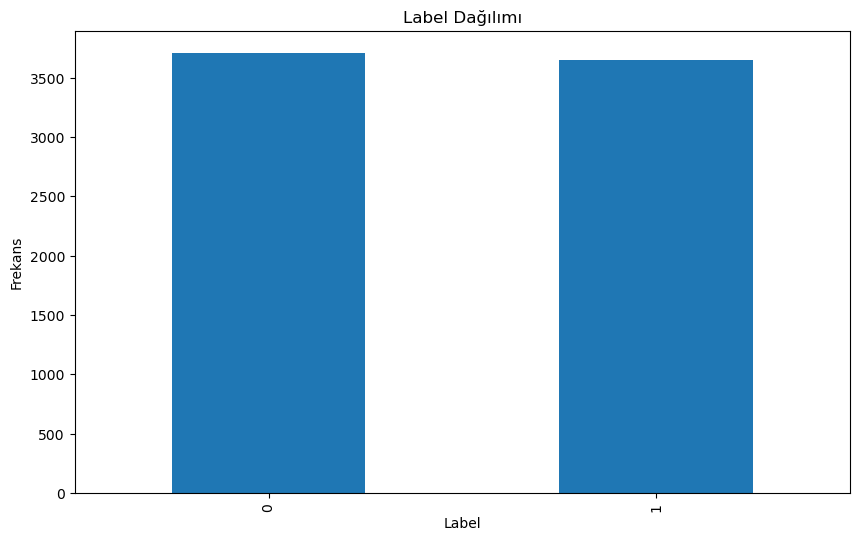

Model: SVM

Confusion Matrix:
[[575 176]
 [ 58 664]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       751
           1       0.79      0.92      0.85       722

    accuracy                           0.84      1473
   macro avg       0.85      0.84      0.84      1473
weighted avg       0.85      0.84      0.84      1473



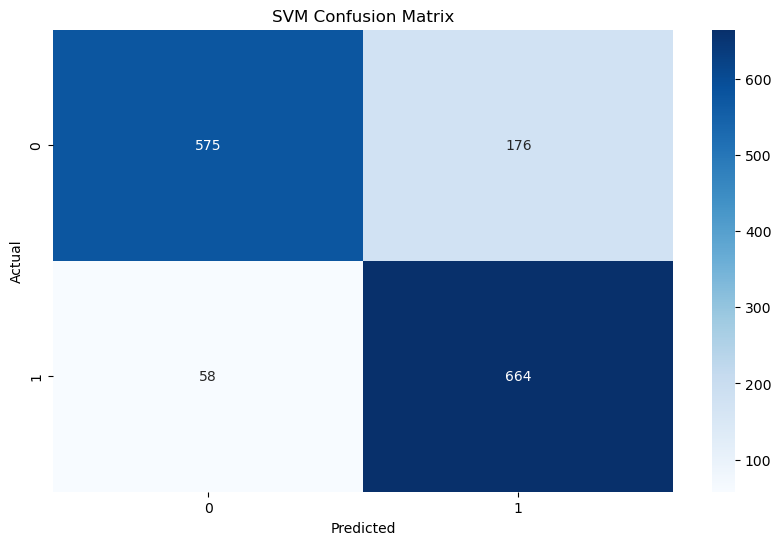

Model: Naive Bayes

Confusion Matrix:
[[633 118]
 [104 618]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       751
           1       0.84      0.86      0.85       722

    accuracy                           0.85      1473
   macro avg       0.85      0.85      0.85      1473
weighted avg       0.85      0.85      0.85      1473



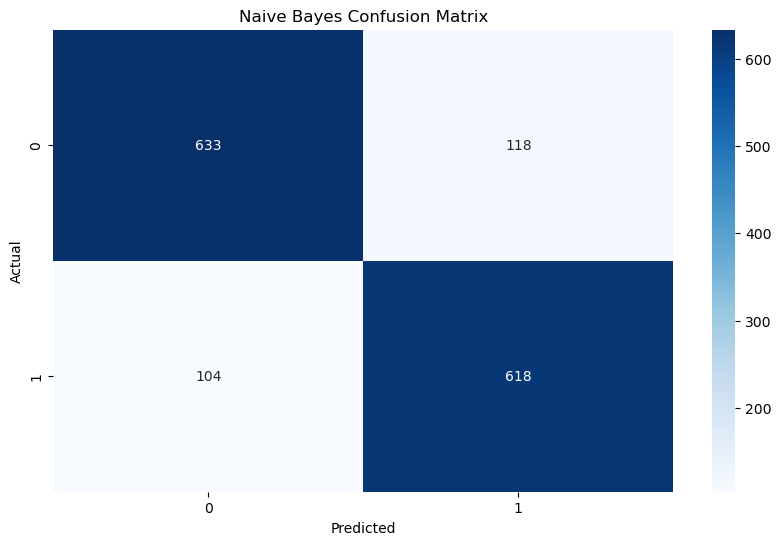

Model: Random Forest

Confusion Matrix:
[[641 110]
 [166 556]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       751
           1       0.83      0.77      0.80       722

    accuracy                           0.81      1473
   macro avg       0.81      0.81      0.81      1473
weighted avg       0.81      0.81      0.81      1473



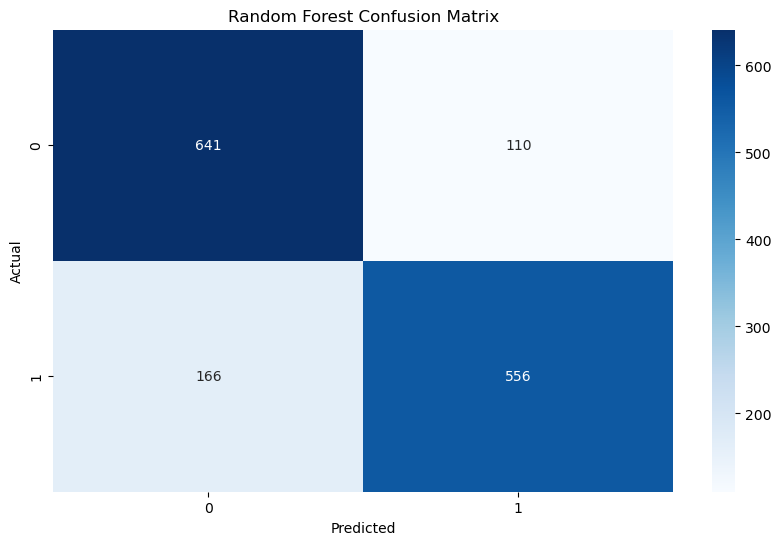

Model: Decision Tree

Confusion Matrix:
[[625 126]
 [221 501]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       751
           1       0.80      0.69      0.74       722

    accuracy                           0.76      1473
   macro avg       0.77      0.76      0.76      1473
weighted avg       0.77      0.76      0.76      1473



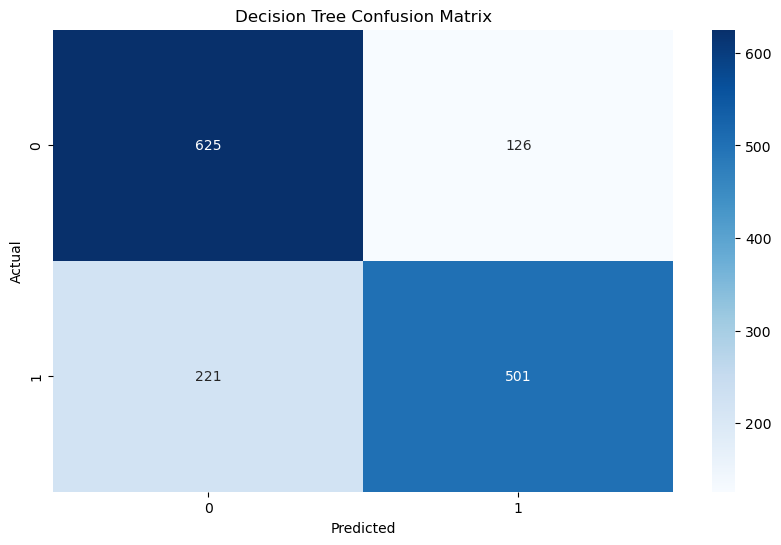

Model: Logistic Regression

Confusion Matrix:
[[572 179]
 [ 83 639]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       751
           1       0.78      0.89      0.83       722

    accuracy                           0.82      1473
   macro avg       0.83      0.82      0.82      1473
weighted avg       0.83      0.82      0.82      1473



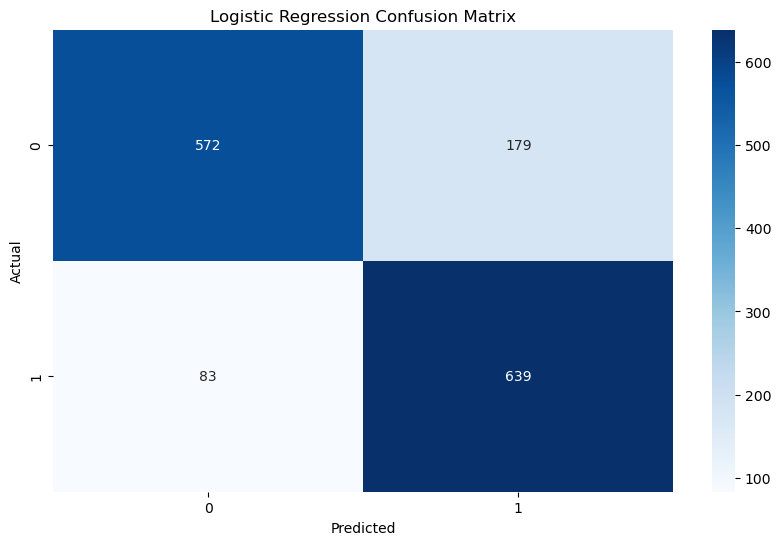

Sınıflandırmak istediğiniz mesajı girin:  salaksın


Tahminler:
SVM: 0
Naive Bayes: 0
Random Forest: 0
Decision Tree: 0
Logistic Regression: 1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns

# Gerekli nltk veri dosyalarını indirin
nltk.download('stopwords')
nltk.download('punkt')

def process_msg(text):
    text = re.sub(r'(@|https?)\S+|#', '', text)
    filters = '@!"\'#$%&()*+,-/:;<=>[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    text = text.lower()
    text = text.strip()

    # Stop words'u kaldırma
    stop_words = set(stopwords.words('turkish'))
    words = word_tokenize(text)
    words_filtered = [word for word in words if word.isalpha() and word not in stop_words]
    text = ' '.join(words_filtered)

    return text

def classify_message(message, vectorizer, models):
    # Mesajı işle
    processed_message = process_msg(message)

    # Mesajı TF-IDF vektörizer ile dönüştür
    X_message = vectorizer.transform([processed_message])

    # Tahminleri al
    predictions = {}
    for model_name, model in models.items():
        prediction = model.predict(X_message)
        predictions[model_name] = prediction[0]

    return predictions

# Veriyi yükle
xt = pd.read_excel('/content/drive/My Drive/TCK_hakaret_tespiti/half29072024_teknofest.xlsx')
xt = xt.dropna()
xt['mesaj'] = xt['mesaj'].astype(str).apply(process_msg)
xt['label'] = xt['label']

# Veri seti boyutunu kontrol et
print("Veri Seti Boyutu:", xt.shape)

# Örnek bir veri kontrolü
print(xt.head())

# Label dağılımını görselleştir
plt.figure(figsize=(10, 6))
xt['label'].value_counts().plot(kind='bar')
plt.title('Label Dağılımı')
plt.xlabel('Label')
plt.ylabel('Frekans')
plt.show()

# Özellik çıkarımı için TF-IDF vektörizer kullan
vectorizer = TfidfVectorizer()

# Veriyi ve etiketleri ayır
X = vectorizer.fit_transform(xt['mesaj'])
y = xt['label']

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Modelleri tanımla
models = {
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Her model için classification report ve confusion matrix oluştur
for model_name, model in models.items():
    print(f"Model: {model_name}")

    # Modeli eğit
    model.fit(X_train, y_train)

    # Test seti üzerinde tahmin yap
    y_pred = model.predict(X_test)

    # Confusion matrix ve classification report oluştur
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Sonuçları yazdır
    print("\nConfusion Matrix:")
    print(conf_matrix)

    print("\nClassification Report:")
    print(class_report)

    # Confusion Matrix görselleştirme
    plt.figure(figsize=(10, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Test ekranı
# Kullanıcıdan mesaj al ve sınıflandır
message = input("Sınıflandırmak istediğiniz mesajı girin: ")
predictions = classify_message(message, vectorizer, models)
print("Tahminler:")
for model_name, prediction in predictions.items():
    print(f"{model_name}: {prediction}")